## Module 3 Project: Automatic lithoclassification of unconsolidated sediments 

## 1. Introduction


In the frame of Sebastian Schaller's PhD project, a large data set of several sedimentological-, geophysical-, and chemical logs (here, logs can be thought of as 'features' in a dataset) were collected from a 252-meter-long drill core. 
The goal is to analyze the data and: 
   - Compare the visual-based classification of the sediments (classic geological route) with a semi-automated data-based clustering of the logs (using clustering techniques or PCA)
   - Another goal would be to develop a log-based way to classify unconsolidated quaternary sediments. This would have several advantages:
       - Core drilling is expensive ~1000 sFr/m
       - Takes a lot of time to analyze and describe -> 1-2 years from drilling to a proper profile
       - A combination of much cheaper destructive drilling with wireline logging would obtain the same logs but without keeping the core intact. This dataset could then be ran through the clustering model to reconstruct the stratigraphy 
       
**Module 2**

During the Module 2 project, and as a first step, the three MSCL-Logs (wet bulk density, magnetic susceptibility, natural gamma radiation) are compared since they represent the most complete data set and have a very close measurement spacing of 0.5 cm. Further, they are measured directly at the cores and, therefore, are directly comparable with the visual core description. Thus, the visual-based classification can be compared with the data-based clustering, and the impact of the different logs can be estimated. 

***M2 Data Analysis***

- Data collection
    - MSCL-core-log data (collected during my PhD-studies)
- Description of the data (for each individual log)
    - Distribution of quality and lithology
    - Calculate mean and std
    - Log data is normally distributed, -> no trend in/homogeneous data set (0-hypothesis-1)
        - Test normality of whole distribution (D`Agostino-Pearson-Test)
        - Test normality of individual sub-datasets (lithological groups) (D`Agostino-Pearson-Test)
    - Distribution of the sub-datasets (based on visible core descriptions) is randomly distributed (0-hypothesis-2)
        - Test similarities of litho groups of each log (Kruskal-Wallis test) 
        - pair-wise comparison of each possible combination of the litho groups (Mannä-Whitney-U test)
    - Choose good plots
    
***M2 Conclusions*** 
- Distribution of log data:
    - Log data is not normally distributed -> q-q plots and D`Agostino-Pearson-Test
    - Sub-data sets are also not normally distributed -> q-q plots and D`Agostino-Pearson-Test
- Distribution of litho groups inside the whole log data:
    - Is not normally distributed, makes geological sense, shows no overlap -> Kruskal-Wallis test and Mann-Whitney-U test
- Judging similarities between the visual core description-based lithological classification and the scatter plots.
    - clustering is visible, backed by geological knowledge
- Qualitatively judging the value/impact of the analyzed logs on the data clustering -> input for the main project: developing a (geo)physical and chemical borehole/drillcore log-based classification system for unconsolidated quaternary sediments.
    - Qualitatively: Density and Natural gamma log  clearly influence the clustering, whereas magnetic susceptibility does not have much impact on clustering by this type of sediments (heterogeneous, reworked, ...)
    - Possible options for other logs for combination: 
        - Resistivity
        - Porosity

**Module 3 Project**


**Definition of significant**

P-values below 0.001 ar considered as  unlikely enough to reject the 0-hypothesis. 

![screenshot_main_profile_reviewed.JPG](/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/images/screenshot_main_profile_reviewed.JPG)

Lithological and petrophysical data versus depth. Columns from left to right: depth-scale [mtd], stratigraphic units (labeled with
A1–A5, B, and C; WTDwater table; LPBDlowest Pleistocene base level), lithotypes, dominant grain size with indicated main lithotypes,
symbols of prominent observations, wet bulk density (gcm^-3), magnetic susceptibility (SI10^-5), natural gamma radiation (CPS,
counts per second), water content with indicated standard deviation (wt %), undrained uniaxial compressive strength (q0u
) (kPa), undrained
shear strength (c0u
) (kPa), organic matter content (wt %), carbonate content (wt %), and the recovery. Main lithotypes are indicated as semitransparent
color codes over the plot’s entire width.

Source: Schaller et al., 2023 (submitted)

# 2. Dataset description and Setup

## 2.1 Setting up the data

In [156]:
# Importing libraries and modules

import os #importing OperationSystem module
import pandas as pd # Pandas

# Machine Learning
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn import metrics
from sklearn.inspection import permutation_importance
#!pip install tensorflow
import tensorflow as tf
#!pip install dtreeviz==1.4.0
from dtreeviz.trees import dtreeviz # remember to load the package

# Visualization
from matplotlib import pyplot as plt
#!pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#!pip install seaborn
import seaborn as sns
sns.set()
import mpltern# used for ternary plots, no standard python library (see: https://mpltern.readthedocs.io/en/latest/ )
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

# Numeric and statistical libraries
import numpy as np #numpy
import scipy #statistic module
from scipy import stats#statistics
import statsmodels.api as sm#statistics

# Others
from time import time as timer
import tarfile

In [127]:
# Options

control = True # if set to True, control values from the data processing will be printed

# Setting the working directory to the directory (raw string input) where the dataset is located
abs_path_log = r'/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/Data'

os.chdir(abs_path_log) # setting working directory to the location of the mscl-log
os.getcwd() # getting the current working directory, to check if I am working in the right directory

'/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/Data'

In [128]:
# Loading and setting up the dataset.

file_name1 = '5068_2_A_Combined_MSCL_data_filtered_rescaled_20230601_ss.csv' # file name of mscl_data
df_mscl = pd.read_csv(file_name1, header = 0) # loading the data as a pandas data frame, with the original headers
df_mscl.head()

Composite_depth [cm]  Rescaled SECT_DEPTH [cm]  SB_DEPTH [m]  SECT_NUM_MC  \
0              0.000000                  0.000000         0.003          1.0   
1              0.582751                  0.582751         0.008          1.0   
2              1.165501                  1.165501         0.013          1.0   
3              1.748252                  1.748252         0.018          1.0   
4              2.331002                  2.331002         0.023          1.0   

   SECT_DEPTH [cm]  CT [cm]   PWAmp  PWAmp (pw and dens filtred)  PWVel [m/s]  \
0              0.3      NaN     NaN                          NaN          NaN   
1              0.8      NaN     NaN                          NaN          NaN   
2              1.3     10.4  0.0001                          NaN     2211.354   
3              1.8     10.4  0.0000                          NaN     8630.704   
4              2.3     10.4  0.0000                          NaN    20432.220   

   PWVel [m/s] (pw and dens filtred)  ...        Imp      FP  Nat_Gamma [cps]  \
0                                NaN  ...        NaN     NaN              NaN   
1                                NaN  ...        NaN     NaN              NaN   
2                                NaN  ...   1307.078  1.2523          10.6644   
3                                NaN  ...   6438.965  1.1624           9.4644   
4                                NaN  ...  19468.360  1.0424          19.0644   

    K [%]  U [ppm]  Th [ppm]  core_quality  litho types               mes_ID  \
0     NaN      NaN       NaN             4            2  5068_2_A_20210526_1   
1     NaN      NaN       NaN             4            2  5068_2_A_20210526_1   
2 -2.9620 -22.1046   72.1170             0            2  5068_2_A_20210526_1   
3 -1.6882 -24.1719  106.0823             0            2  5068_2_A_20210526_1   
4 -7.6081 -66.6650  158.7609             0            2  5068_2_A_20210526_1   

       section_ID  
0  5068_2_A_001_1  
1  5068_2_A_001_1  
2  5068_2_A_001_1  
3  5068_2_A_001_1  
4  5068_2_A_001_1  

[5 rows x 24 columns]

In [129]:
# Summary of the loaded sediment core drill log dataset

# Extracting column headers and converting them into a Pandas Series
header_data = pd.Series(df_mscl.columns)

# Selecting specific columns of interest: Filtered and UnFiltered density, magnetic logs,
# natural gamma log, data quality classification, and lithoclast classification
used_columns_indices = [0, 1, 10, 13, 16, 20, 21, 23]
header_list_df_reduced = list(header_data[used_columns_indices])

# Creating a new DataFrame with only the selected data columns
df_reduced = df_mscl[header_list_df_reduced]

# Rounding the data to a reasonable precision:
# - Density rounded to 3 significant digits
# - Magnetic and gamma logs rounded to 1 significant digit

# Copying the DataFrame to preserve the original and overwrite with the rounded values
df_reduced = df_reduced.copy()

# Rounding specific columns to the desired precision
df_reduced.iloc[:,2] = df_reduced[header_list_df_reduced[2]].round(decimals = 2).copy() # density data
df_reduced.iloc[:,3:5] = df_reduced[header_list_df_reduced[3:5]].round(decimals = 1).copy()  # magsus and gamma data

# Displaying the first few rows of the modified DataFrame
df_reduced.head()

Composite_depth [cm]  Rescaled SECT_DEPTH [cm]  Dens [g/cc]  \
0              0.000000                  0.000000          NaN   
1              0.582751                  0.582751          NaN   
2              1.165501                  1.165501         0.59   
3              1.748252                  1.748252         0.75   
4              2.331002                  2.331002         0.95   

   Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  core_quality  litho types  \
0                          NaN              NaN             4            2   
1                          NaN              NaN             4            2   
2                         13.3             10.7             0            2   
3                         14.2              9.5             0            2   
4                         14.9             19.1             0            2   

       section_ID  
0  5068_2_A_001_1  
1  5068_2_A_001_1  
2  5068_2_A_001_1  
3  5068_2_A_001_1  
4  5068_2_A_001_1

In [130]:
# Reducing the litho class range to the four main types: D = diamicts (1 <= litho type < 7), G = Gravel (7 <= litho type < 11), S = Sand (11 <= litho type < 19), F = fines (clay +silt; >= 19)

# Assign the value 19 (Fines) to any element in the specified column that is greater than or equal to 19.
# Assign the value 11 (Sand) to any element in the specified column that is less than 19 but greater than or equal to 11.
# Assign the value 7 (Gravel) to any element in the specified column that is less than 19 but greater than or equal to 11.
# Assign the value 1 (Diamicts) to any element in the specified column that is less than 7.

df_reduced[header_list_df_reduced[-2]] = np.where(df_reduced[header_list_df_reduced[-2]]>= 19,19,
                                                 np.where((df_reduced[header_list_df_reduced[-2]]<19)&
                                                          (df_reduced[header_list_df_reduced[-2]]>= 11),11,
                                                          np.where((df_reduced[header_list_df_reduced[-2]]<11)
                                                                   &(df_reduced[header_list_df_reduced[-2]]>= 7),7,1)))

df_reduced.head()
#df_reduced['core_quality'].max()

Composite_depth [cm]  Rescaled SECT_DEPTH [cm]  Dens [g/cc]  \
0              0.000000                  0.000000          NaN   
1              0.582751                  0.582751          NaN   
2              1.165501                  1.165501         0.59   
3              1.748252                  1.748252         0.75   
4              2.331002                  2.331002         0.95   

   Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  core_quality  litho types  \
0                          NaN              NaN             4            1   
1                          NaN              NaN             4            1   
2                         13.3             10.7             0            1   
3                         14.2              9.5             0            1   
4                         14.9             19.1             0            1   

       section_ID  
0  5068_2_A_001_1  
1  5068_2_A_001_1  
2  5068_2_A_001_1  
3  5068_2_A_001_1  
4  5068_2_A_001_1

In [131]:
# Adding an array containing the corresponding litho type labels
label_array = np.where(df_reduced[header_list_df_reduced[-2]] == 1,'Diamict',
                        np.where(df_reduced[header_list_df_reduced[-2]] == 7,'Gravel',
                                np.where(df_reduced[header_list_df_reduced[-2]] == 11,'Sand','Fines')))
# Updating dataframe
df_reduced = df_reduced.assign(label = label_array)
df_reduced.head()

Composite_depth [cm]  Rescaled SECT_DEPTH [cm]  Dens [g/cc]  \
0              0.000000                  0.000000          NaN   
1              0.582751                  0.582751          NaN   
2              1.165501                  1.165501         0.59   
3              1.748252                  1.748252         0.75   
4              2.331002                  2.331002         0.95   

   Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  core_quality  litho types  \
0                          NaN              NaN             4            1   
1                          NaN              NaN             4            1   
2                         13.3             10.7             0            1   
3                         14.2              9.5             0            1   
4                         14.9             19.1             0            1   

       section_ID    label  
0  5068_2_A_001_1  Diamict  
1  5068_2_A_001_1  Diamict  
2  5068_2_A_001_1  Diamict  
3  5068_2_A_001_1  Diamict  
4  5068_2_A_001_1  Diamict

In [132]:
# Excluding the heavily disturbed data points (-> core quality class >2) and dropping any remaning NaNs (to be safe)

#df_reduced_clean = df_reduced[df_reduced[header_list_df_reduced[-2]]<2].copy().dropna()
#df_reduced_clean

# Filtering the dataframe (Filtering relevant values of each desired log, filtering quality class and removing NaNs)
# Excluding all rows where density is <1.5
df_reduced_filtered_dens = df_reduced[df_reduced[header_list_df_reduced[2]]>=1.5].copy()
# Excluding all rows, where magsus is >100
df_reduced_filtered_dens_magsus = df_reduced_filtered_dens[df_reduced_filtered_dens[header_list_df_reduced[3]]<=100].copy()
# Excluding all rows, wherre natgamma is <0
df_reduced_filtered_dens_magsus_gamma = df_reduced_filtered_dens_magsus[df_reduced_filtered_dens_magsus[header_list_df_reduced[4]]>=0].copy()
# Excluding all disturbed data, i.e., with a quality class =>2 
df_reduced_filtered_cq =  df_reduced_filtered_dens_magsus_gamma[df_reduced_filtered_dens_magsus_gamma[header_list_df_reduced[-3]]<2].copy()
# Dropping all rows with any remaining NaNs 
df_reduced_cleaned = df_reduced_filtered_cq.dropna().copy()

df_reduced_cleaned.head()

Composite_depth [cm]  Rescaled SECT_DEPTH [cm]  Dens [g/cc]  \
23             13.403263                 13.403263         1.53   
24             13.986014                 13.986014         1.56   
25             14.568765                 14.568765         1.62   
26             15.151515                 15.151515         1.73   
27             15.734266                 15.734266         1.78   

    Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  core_quality  litho types  \
23                         18.2             27.1             0            1   
24                         18.0             27.9             0            1   
25                         17.9             36.1             0            1   
26                         18.1             30.3             0            1   
27                         18.2             36.5             0            1   

        section_ID    label  
23  5068_2_A_001_1  Diamict  
24  5068_2_A_001_1  Diamict  
25  5068_2_A_001_1  Diamict  
26  5068_2_A_001_1  Diamict  
27  5068_2_A_001_1  Diamict

In [133]:
# Control prints to see if everything worked out

if control == True:
    print('Information on complete data set: ')
    print(df_mscl.info()) # prints info of complete data set
    print()

    print('Information on reduced data set:')
    print(df_reduced.info()) # info of reduced data frame
    print('First 5 rows of the reduced data set: ')
    print(df_reduced.head())
    print()

    print('Information on reduced and cleaned data set: ')
    print(df_reduced_cleaned.info())   
    print('First 5 rows of the reduced and cleaned data set: ')
    print(df_reduced_cleaned.head())
    print()

    # Setup and extract the needed data for the data for the plots of the filtering impact on lithology and core quality distribution
    # Unfiltered
    total_nr_dp_uf = len(df_reduced[header_list_df_reduced[-3]])#total number of data points
    # Counts of unique values in quality (classes) and lithologies (main litho groups)
    values_cq_uf, counts_cq_uf = np.unique(df_reduced[header_list_df_reduced[-3]], return_counts= True) # quality
    values_lith_uf, counts_lith_uf = np.unique(df_reduced[header_list_df_reduced[-2]], return_counts= True) # lithology
    # Filtered
    # Total number of data points
    total_nr_dp_c = len(df_reduced_cleaned[header_list_df_reduced[-3]])# total number of data points 
    # Counts of unique values in quality (classes) and lithologies (main litho groups)
    values_cq_c, counts_cq_c = np.unique(df_reduced_cleaned[header_list_df_reduced[-3]], return_counts= True) # quality
    values_lith_c, counts_lith_c = np.unique(df_reduced_cleaned[header_list_df_reduced[-2]], return_counts= True) # lithology
    
    print(f'Number of NaNs in UnFiltered dataset: {df_reduced[header_list_df_reduced[2]].isna().sum()} (should be equal to the number of points (frequency) of Core Quality = 4)')
    print(f'Number of NaNs in Filtered dataset: {df_reduced_clean[header_list_df_reduced[2]].isna().sum()} (should be 0)')
    print('Lithoclasses: Diamict (1), Gravel (7), Sand (11), and Fines (19)')
    print(f'Unfiltered quality clases:{values_cq_uf}, corresponding frequencies: {counts_cq_uf}')
    print(f'Unfiltered litho classes {values_lith_uf}, corresponding frequencies: {counts_lith_uf}')        
    print(f'Filtered quality clases:{values_cq_c}, corresponding frequencies: {counts_cq_c}')
    print(f'Filtered litho classes {values_lith_c}, corresponding frequencies: {counts_lith_c}')

Information on complete data set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47591 entries, 0 to 47590
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Composite_depth [cm]               47591 non-null  float64
 1   Rescaled SECT_DEPTH [cm]           47591 non-null  float64
 2   SB_DEPTH [m]                       47591 non-null  float64
 3   SECT_NUM_MC                        47591 non-null  float64
 4   SECT_DEPTH [cm]                    47591 non-null  float64
 5   CT [cm]                            46350 non-null  float64
 6   PWAmp                              46350 non-null  float64
 7   PWAmp (pw and dens filtred)        3647 non-null   float64
 8   PWVel [m/s]                        46350 non-null  float64
 9   PWVel [m/s] (pw and dens filtred)  3647 non-null   float64
 10  Dens [g/cc]                        46350 non-null  float64
 11  Dens [g/cc] (pw and

## 3. Comparison of the datasets

### 3.1 Setting up the data

In [134]:
df_reduced_cleaned_scatter = df_reduced_cleaned.copy()
#creating and adding the normalised data to the original data frame, (x_norm = x-x_min/x_max-x_mib)
logs_min =pd.DataFrame(df_reduced_cleaned_scatter[header_list_df_reduced[2:5]].describe().loc[['min']])#minimal values
logs_max= pd.DataFrame(df_reduced_cleaned_scatter[header_list_df_reduced[2:5]].describe().loc[['max']])#maximal values
logs_delta = logs_max.iloc[0] - logs_min.iloc[0]#delta

#adding the normalised data as a new columne to the data frame
df_reduced_cleaned_scatter = df_reduced_cleaned_scatter.assign(
    dens_norm=((df_reduced_cleaned_scatter[header_list_df_reduced[2]]-logs_min.iloc[0,0])/logs_delta.iloc[0]),
    magsus_norm=((df_reduced_cleaned_scatter[header_list_df_reduced[3]]-logs_min.iloc[0,1])/logs_delta.iloc[1]),
    gamma_norm=((df_reduced_cleaned_scatter[header_list_df_reduced[4]]-logs_min.iloc[0,2])/logs_delta.iloc[2])) 

# masking and separating the data into the individual sub-datasets, 
# extracting the statistical summary of the data for later use
# Setting up the needed input
litho_list = [1,7,11,19] #list with numerical code of main litho types (1=diamict, 7=gravel, 11=sand, 19= fines)
#prelocating the later extracted/created values
#for output of pd.describe()
summary_list = [0]*len(litho_list)#not normalised
summary_list_norm = [0]*len(litho_list)#normalised to 1
#masked data sets, sub data sets
data_log = [0]*len(litho_list)#not normalised
data_log_norm = [0]*len(litho_list)#normalised to 1

#for-loop to mask over the four main lithogroups and extract the sub-datasets and the statistical summary for later use (pd.describe())
for i in range(len(litho_list)): 
    #renaming the data frame for easier handling
    all_data = df_reduced_cleaned_scatter
    #masking over the four main litho types, 
    all_data_f = all_data[df_reduced_cleaned_scatter[header_list_df_reduced[-2]] == litho_list[i]]
    
    #extracting the log data (Dens, Magsus, Natgamma)
    data = all_data_f.iloc[:,2:5]#not normalised
    data_norm = all_data_f.iloc[:,9:]#normalised 
    #adding the data to the coresponding lsit  
    data_log[i]= data#not normalised  
    data_log_norm[i] = data_norm#normalised                               
    #adding the statisitc output summary of the masked subdata set
    summary_list[i] = pd.DataFrame(data.describe()).round(2)#not normalised  
    summary_list_norm[i] = pd.DataFrame(data_norm.describe()).round(2)#normalised


if control == True:  
    #checking the impacts of the different filters
    #print(f'Unfiltered: {df_reduced.info()}')
    #print()

    #print(f'Density filtered: {df_reduced_filtered_dens.info()}')
    #print()

    #print(f'magnetic susceptibility filtered: {df_reduced_filtered_dens_magsus.info()}')
    #print()

    #print(f'natural gamma radiation filtered: {df_reduced_filtered_dens_magsus_gamma.info()}')
    #print()

    #print(f'Core quality class filtered: {df_reduced_filtered_cq.info()}')
    #print()

    #print(f'NaN filtered: {df_reduced_filtered_cq.info()}')
    #print()

    print(f'Cleaned dataset:{df_reduced_cleaned_scatter.info()}')
    print()

    print(f'summary list:{summary_list}')
    print()

<class 'pandas.core.frame.DataFrame'>
Index: 40276 entries, 23 to 47578
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Composite_depth [cm]         40276 non-null  float64
 1   Rescaled SECT_DEPTH [cm]     40276 non-null  float64
 2   Dens [g/cc]                  40276 non-null  float64
 3   Mag_Sus BS_cor [SI x 10^-5]  40276 non-null  float64
 4   Nat_Gamma [cps]              40276 non-null  float64
 5   core_quality                 40276 non-null  int64  
 6   litho types                  40276 non-null  int64  
 7   section_ID                   40276 non-null  object 
 8   label                        40276 non-null  object 
 9   dens_norm                    40276 non-null  float64
 10  magsus_norm                  40276 non-null  float64
 11  gamma_norm                   40276 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 4.0+ MB
Cleaned dataset:None


In [135]:
all_data_f.head()
df_reduced_cleaned.head()

Composite_depth [cm]  Rescaled SECT_DEPTH [cm]  Dens [g/cc]  \
23             13.403263                 13.403263         1.53   
24             13.986014                 13.986014         1.56   
25             14.568765                 14.568765         1.62   
26             15.151515                 15.151515         1.73   
27             15.734266                 15.734266         1.78   

    Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  core_quality  litho types  \
23                         18.2             27.1             0            1   
24                         18.0             27.9             0            1   
25                         17.9             36.1             0            1   
26                         18.1             30.3             0            1   
27                         18.2             36.5             0            1   

        section_ID    label  
23  5068_2_A_001_1  Diamict  
24  5068_2_A_001_1  Diamict  
25  5068_2_A_001_1  Diamict  
26  5068_2_A_001_1  Diamict  
27  5068_2_A_001_1  Diamict

### 3.2 Scatter plots

#### 3.2.1 Summary scatter plots

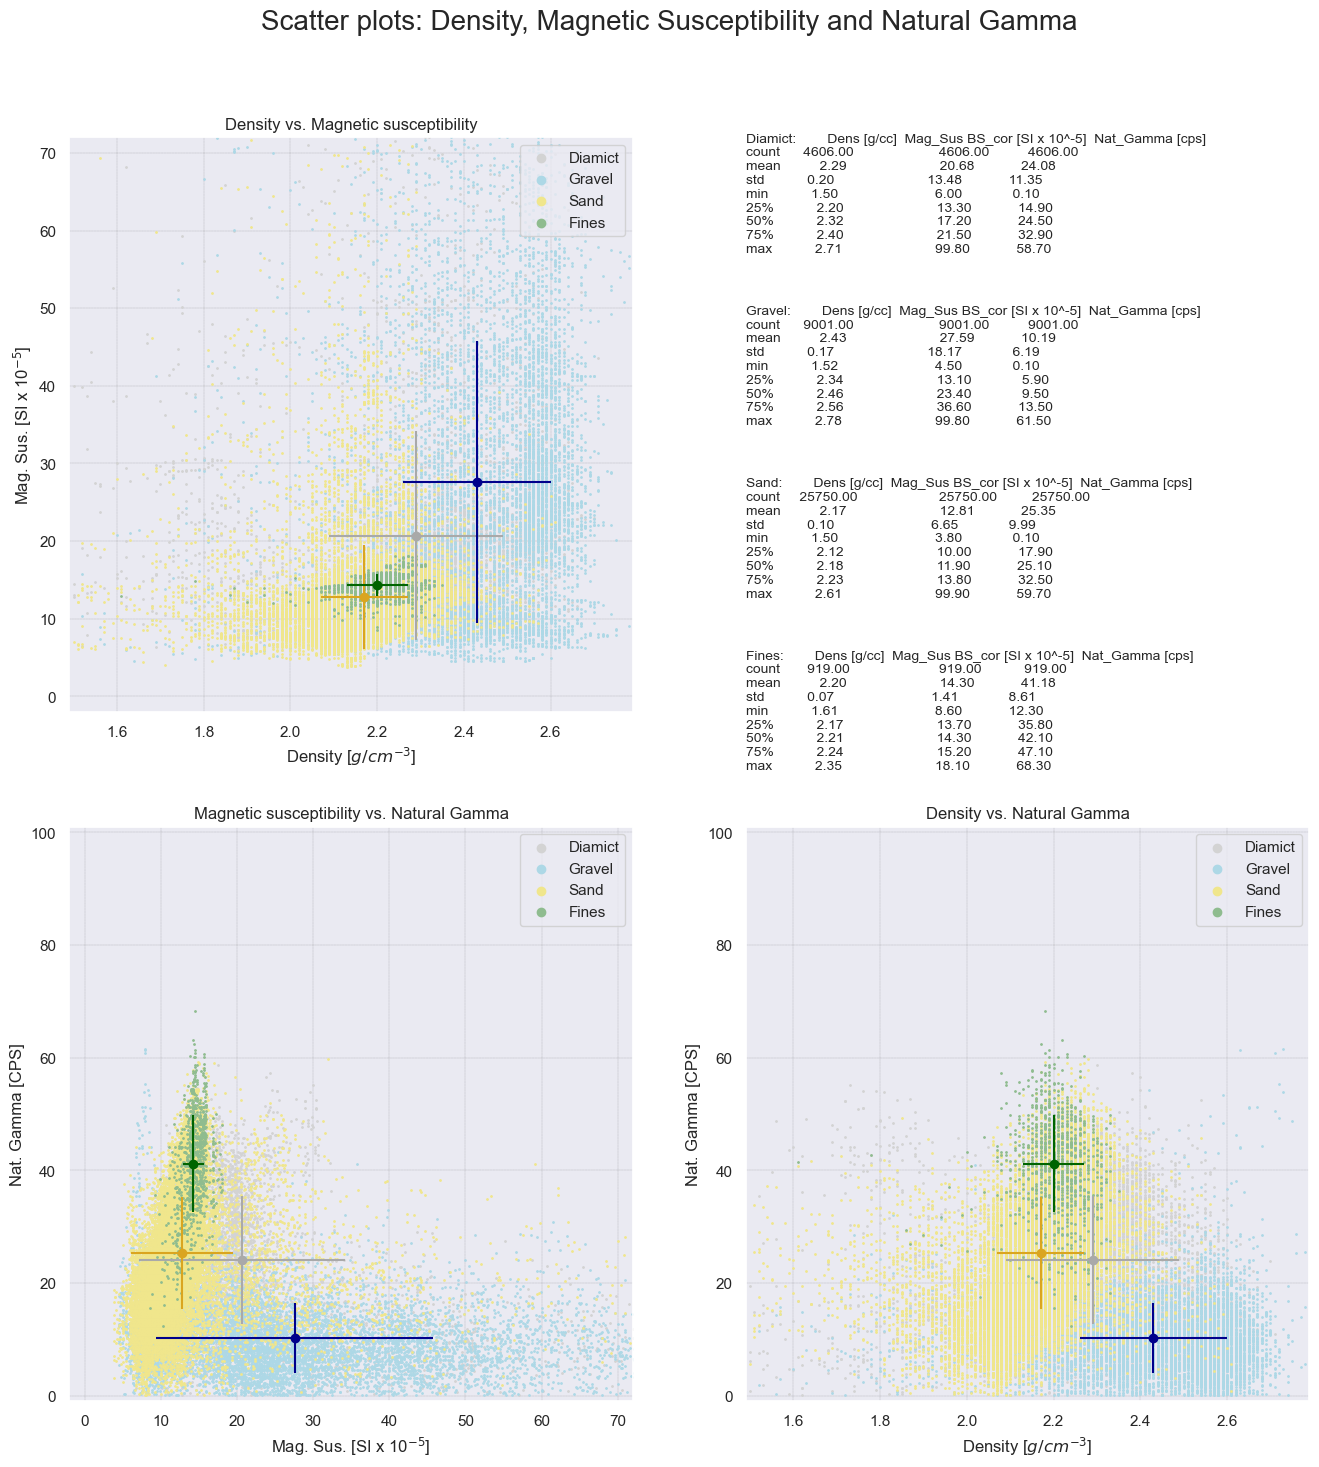

In [136]:
# Setting up the needed input for the scatter plots

colors = ['lightgray','lightblue','khaki','darkseagreen'] # color list
colors_dark = ['darkgray','darkblue','goldenrod','darkgreen'] # color list
labels = ['Diamict','Gravel','Sand','Fines'] # list of labels for subsets of histogramms
axis_labels = ['Density [$\t{g/cm}^{-3}$]','Mag. Sus. [SI x 10$^{-5}$]','Nat. Gamma [CPS]'] # axis labes
title_list = ['Density vs. Magnetic susceptibility','Magnetic susceptibility vs. Natural Gamma',
              'Density vs. Natural Gamma'] # title 
axis_limits = [[1.49,2.79],[-2, 72],[-1, 101]] # axis limits

index1 = [0,1,0] # indices of used X data/axis 
index2 = [1,2,2] # indices of used y data/axis

# Scatterplot combined in three panels, plots all four litho groups in one panel

# Setting up the supplots
fig18, ax = plt.subplots(2,2, figsize=(16,16))
fig18.suptitle('Scatter plots: Density, Magnetic Susceptibility and Natural Gamma',fontsize=20) 
# setting the position of the title
fig18.subplots_adjust(top=0.9)

#for-loop to plot the combined scatter plots of of the four main litho groups 
#plot 1 (0/0):Density vs Magnetic susceptibility
#plot 2 (1/0):Magnetic susceptibility vs Natural Gamma
#plot 3 (1/1):Density vs Natural Gamma

c = 0 # sets start value of counter to 0
for i in range(2): # looping over the columns
    for j in range(2): # looping over the rows
        if (i == 0) and (j==1): # condition to hide plot at position 0/1, 
            ax[i][j].axis('off')
            for x in range(len(colors)): # plots the statistical summary of the 4 sub-datasets at position 0:1
                ax[i][j].text(0,(0.8-0.3*x),f'{labels[x]}: {summary_list[x]}',fontsize=10)
            c=c-1 # reduce the counter by 1 to correct the needed value for the other plots
        else: 
            # plot command loops over the four main litho groups
            for x in range(len(colors)):
                # scatter plot of whole sub-dataset
                ax[i][j].scatter(data_log[x].iloc[:,index1[c]],data_log[x].iloc[:,index2[c]],c=colors[x],s = 1,
                                 label=labels[x]) 
                # plots the mean value with the standard deviation
                ax[i][j].errorbar(summary_list[x].iloc[1,index1[c]],summary_list[x].iloc[1,index2[c]],
                                  xerr=summary_list[x].iloc[2,index1[c]],yerr= summary_list[x].iloc[2,index2[c]],
                                  fmt='o', c=colors_dark[x])
                # plot settings
                ax[i][j].set_title(title_list[c]) # title
                ax[i][j].set_ylabel(axis_labels[index2[c]]) # y-axis label
                ax[i][j].set_xlabel(axis_labels[index1[c]]) # x-axis label
                ax[i][j].set_ylim(axis_limits[index2[c]]) # y-axis limits
                ax[i][j].set_xlim(axis_limits[index1[c]]) # x-axis limits
                ax[i][j].legend(markerscale=6,loc="upper right") # legend
                ax[i][j].grid(color='k', linestyle='--', linewidth=0.1) # grid                               
        c = c+1 # updating the counter if plot was completed
                

#### 3.2.2 Individual lithoclass scatter plots

### 3.3 Ternary plots

#### 3.3.1 Summary ternary plots

#### 3.3.2 Individual lithoclass ternary plots

### 3.4 3D Plots

In [141]:
#creating dictonary of labels (litho types: Diamict, Gravel etc) with the colors
color_label_dict = dict(zip(labels, colors))

if control == True:  
    print(color_label_dict)

{'Diamict': 'lightgray', 'Gravel': 'lightblue', 'Sand': 'khaki', 'Fines': 'darkseagreen'}


#### 3.4.1 Combined

In [174]:
# Creating 3d plot

fig22 = px.scatter_3d(df_reduced_cleaned ,x='Dens [g/cc]', y='Mag_Sus BS_cor [SI x 10^-5]',z='Nat_Gamma [cps]',
                      color = 'label', 
                      # setting up the color map with the corresponding colors/labels
                      color_discrete_map=color_label_dict,
                     title="3D plot of MSCL-data") # title

fig22.update_traces(marker_size=2) # changing marker sice
fig22.update_layout(
    height=800,
    width=800,
    scene=dict(
        xaxis_title= 'Density [g/cc]',
        yaxis_title= 'Mag. Sus. [SI x 10^-5]',
        zaxis_title= 'Nat. Gamma [cps]'
    ),
    legend=dict(title='Lithoclasses')
)

fig22.update_layout(
    legend=dict(
        traceorder='normal',
        tracegroupgap=0,
        itemsizing='constant',
        itemwidth=30  # Adjust the width of legend items
    )
)

fig22.show()

#axis_labels = ['Density [$\t{g/cm}^{-3}$]','Mag. Sus. [SI x 10$^{-5}$]','Nat. Gamma [CPS]']

#### 3.4.1 Individual

In [176]:
# Data Setup
a = df_reduced_cleaned['Dens [g/cc]']
b = df_reduced_cleaned['Mag_Sus BS_cor [SI x 10^-5]']
c = df_reduced_cleaned['Nat_Gamma [cps]']
d = df_reduced_cleaned['label']

# Row and columnn indices for subplot positions
row_index = [1,1,2,2]
col_index = [1,2,1,2]


# Settings for supplot
fig23 = make_subplots(rows=2, cols=2,
                      subplot_titles=(labels),
                      horizontal_spacing = 0.05,vertical_spacing= 0.05,
                      specs=[[{'type': 'scene'},{'type': 'scene'}],
                             [{'type': 'scene'}, {'type': 'scene'}]])

# Fig size and main title
fig23.update_layout(autosize=False,height=900, width=900,
                    title_text="3D-scatter plots of the mscl-data: Individual litho classes")
  
# Ploting the sub-datasets of each litho group separately
for i in range(len(labels)):
    
    fig23.append_trace(go.Scatter3d(x = a[d== labels[i]],y =b[d== labels[i]],z=c[d== labels[i]],mode='markers',
                                 marker={"color":colors[i]}), row=row_index[i], col=col_index[i])

# Axes titles   
fig23.update_scenes(xaxis_title_text='Density [g/cc]',  yaxis_title_text='Mag. Sus. [SI x 10^-5]', zaxis_title_text='Nat. Gamma [cps]')

# Setting the axis limits
fig23.update_scenes(xaxis=dict(nticks=10, range=[2.7,1.7]),
                    yaxis=dict(nticks=10, range=[0,100]),
                    zaxis=dict(nticks=10, range=[0,100]))

# Updating layouts and formatting
fig23.update_layout(
    legend=dict(title='Lithoclasses')
)

fig23.update_layout(
    legend=dict(
        traceorder='normal',
        tracegroupgap=0,
        itemsizing='constant',
        itemwidth=30  # Adjust the width of legend items
    )
)

# Updating marker size
fig23.update_traces(marker_size=1)
fig23.show()

### Tests with supervised classification

In [117]:
# Importing new relevant libraries

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
# Selecting and saving the names of the relevant columns in the dataframe

features = ['Composite_depth [cm]','Dens [g/cc]', 'Mag_Sus BS_cor [SI x 10^-5]', 'Nat_Gamma [cps]']

labels = df_reduced_cleaned["label"].unique()
print(f'The types of lithoclasses are: {labels}')


The types of lithoclasses are: ['Diamict' 'Gravel' 'Sand' 'Fines']


In [86]:
# These two do the same thing: Create a numpy array that contains the relevant numerical columns needed for the analysis. 
#x = df_reduced_cleaned.loc[:,features].values

#x = df_reduced_cleaned[features].values

#print(x[0:10,0])
#print(x[0:10,1])
#print(x[0:10,2])

In [119]:
scaler = StandardScaler()

#Using Numpy Arrays

x = df_reduced_cleaned.loc[:,features].values
#print(x[0:10,0])  #checks values
#print(x[0:10,1])
#print(x[0:10,2])
x = scaler.fit_transform(x)

#print(x[0:10,0])  #checks normalised values
#print(x[0:10,1])
#print(x[0:10,2])
x.shape

# Using the dataframe directly

df_reduced_cleaned_norm = df_reduced_cleaned.copy()
df_reduced_cleaned_norm[features] = scaler.fit_transform(df_reduced_cleaned[features])
df_reduced_cleaned_norm.head()

target = 'litho types'

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df_reduced_cleaned_norm[features], df_reduced_cleaned_norm[target], test_size=0.2, random_state=42)

# Initialize StratifiedShuffleSplit
strat_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in strat_splitter.split(df_reduced_cleaned_norm[features], df_reduced_cleaned_norm[target]):
    x_train, x_test = df_reduced_cleaned_norm.iloc[train_index][features], df_reduced_cleaned_norm.iloc[test_index][features]
    y_train, y_test = df_reduced_cleaned_norm.iloc[train_index][target], df_reduced_cleaned_norm.iloc[test_index][target]


In [120]:
# Seeing the shape of each re-shaped vector. Note that (if above is correct), the shape should be 60000 (number of images) x 784 (which is 28 x 28; as all pixels in each image are placed in a row, i.e. there is one row per image)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((32220, 4), (32220,), (8056, 4), (8056,))

In [121]:
# 1. Create classifier model
multi_class = 'multinomial'
solver = 'lbfgs'
logreg_clf = LogisticRegression(solver=solver, multi_class=multi_class)

# 2. Initialize and train Logistic Regression model
t1 = timer()
logreg_clf.fit(x_train, y_train)
t2 = timer()
print ('training time: %.1fs'%(t2-t1))
# Now, the 'logreg_clf' classifier that we created above, is 'trained' 

# 3. Evaluate accuracy on train and test datasets
print("Training score : %.3f" % (logreg_clf.score(x_train, y_train)))
print("Test score : %.3f" % (logreg_clf.score(x_test, y_test)))
print()

# 4. Predict on the test set
y_p_test = logreg_clf.predict(x_test)
y_p_train = logreg_clf.predict(x_train)

# 5. Calculate the confusion matrix (CM) to evaluate the classifier's performance
cm_test = metrics.confusion_matrix(y_test, y_p_test)
cm_train = metrics.confusion_matrix(y_train, y_p_train) # Calculate the CM on the training set for a sanity check

cm = cm_test
# Print the accuracy using the CM (matches the accuracy from the score method)
accuracy = np.sum([cm[i, i] for i in range(4)]) / np.sum(cm)
print(f'The accuracy with the CM method is: {accuracy}. This should be the same as with the score method')
print()
# Evaluate the performance using a classification report and a printed visualisation of the confusion matrix
print("Classification Report:\n", classification_report(y_test, y_p_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_p_test))


training time: 0.4s
Training score : 0.840
Test score : 0.845

The accuracy with the CM method is: 0.8447120158887785. This should be the same as with the score method

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.22      0.33       921
           7       0.84      0.87      0.85      1800
          11       0.86      0.98      0.91      5151
          19       0.59      0.09      0.15       184

    accuracy                           0.84      8056
   macro avg       0.75      0.54      0.56      8056
weighted avg       0.83      0.84      0.81      8056

Confusion Matrix:
 [[ 200  234  486    1]
 [  43 1561  195    1]
 [  42   72 5028    9]
 [   0    0  168   16]]


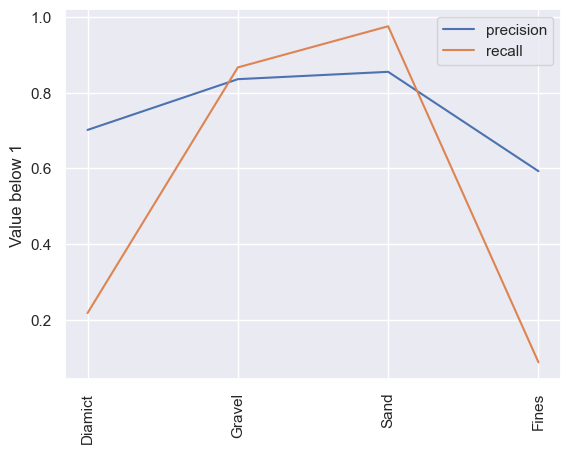

In [122]:
# 6. Inspect the confusion metrics and compute using matrix manipulations the precision and recall for each category

# Create empty lists to store precision and recall values for each class
precisions = []
recalls = []

# Calculate precision for each class (0-3)
for i in range(4):
    precision = cm[i, i] / np.sum(cm[:, i])
    precisions.append(precision)

# Calculate recall for each class (0-3)
for i in range(4):
    recall = cm[i, i] / np.sum(cm[i, :])
    recalls.append(recall)

# Plot precision and recall values for each class using class names
plt.plot(labels, precisions, label='precision')  
plt.plot(labels, recalls, label='recall')  

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.ylabel('Value below 1')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

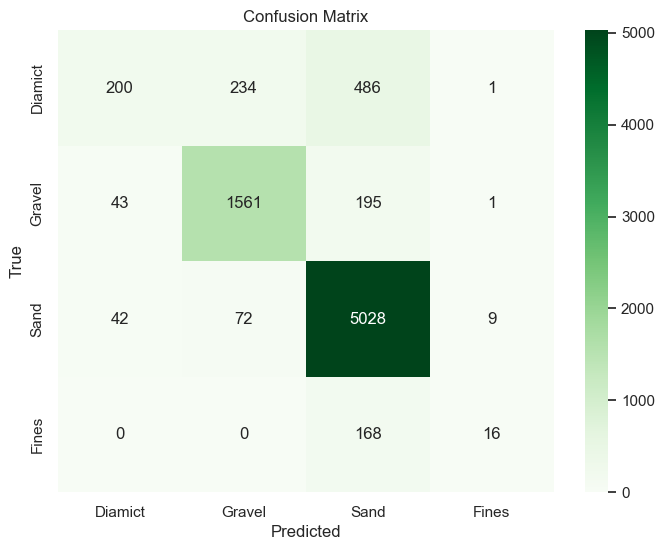

In [123]:
# 7. Plot confusion matrix if desired

# Uncomment to calculate percentages by dividing each cell by the sum of the respective row (i.e., the total number of images that actually form part of the class "Row name")
cm_percentages = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
matrix = cm # cm_percentages
fmt = 'd' # 0.1%
sns.heatmap(matrix, annot=True, fmt=fmt, cmap='Greens', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()